In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
import os
sys.path.insert(0, '..') 
import spectral_denoising as sd
from spectral_denoising.file_io import standardize_col
from spectral_denoising.search_utils import *
from spectral_denoising.spectral_operations import *
from spectral_denoising.spectral_denoising import *
from spectral_denoising.search_utils import *
from spectral_denoising.spectral_denoising import *
from spectral_denoising.spectral_operations import *
from spectral_denoising.identifier_utils import *
from spectral_denoising.spectra_plotter import *
from tqdm import tqdm
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/extended_figures/extended_fig6'
import seaborn as sns

import matplotlib.pyplot as plt
if os.path.exists(fig_dir) == False:
    os.mkdir(fig_dir)
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
def calculate_fdr_given_threshold(result_df, cutoff, top_n = 3):
    fdr_raws = []
    fdr_denoise = []
    for l in result_df['label'].unique():
        cur_com = string_search(result_df, 'label', l)
        raw_p = cur_com[cur_com['entropy_denoised_raw']>=cutoff]
        raw_p.sort_values(by = 'entropy_denoised_raw', ascending=False, inplace = True)
        raw_p = raw_p.iloc[0:top_n]
        raw_fp = raw_p[raw_p['tag']==False]
        d_p = cur_com[cur_com['entropy_denoised_denoised']>=cutoff]
        d_p.sort_values(by = 'entropy_denoised_denoised', ascending=False, inplace = True)
        d_p=d_p.iloc[0:top_n]
        d_fp = d_p[d_p['tag']==False]
        if len(d_p)>0 and len(raw_p)>0:
            fdr_raws.append(len(raw_fp)/len(raw_p))

            fdr_denoise.append(len(d_fp)/len(d_p))
        else:
            fdr_raws.append(np.nan)
            fdr_denoise.append(np.nan)
        # raw_n = cur_com[cur_com['entropy_denoised_raw']<cutoff]
    # return fdr_raws, fdr_denoise
    return(np.nanmean(fdr_raws),np.nanmean(fdr_denoise) )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
result_df = sd.read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/denoising_data/masswiki_searched_with_recal_bd.csv')

done read in df...


In [4]:
scope = np.arange(1,99)/100

100%|██████████| 98/98 [01:29<00:00,  1.10it/s]


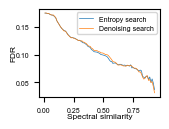

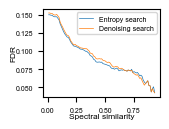

In [7]:
fdr_r_all = []
fdr_d_all = []
for s in tqdm(scope):
    fdr_r, fdr_d = calculate_fdr_given_threshold(result_df, s)
    fdr_r_all.append(fdr_r)
    fdr_d_all.append(fdr_d)
start = 0
end = 93
df_all_top3 = pd.DataFrame({'similarity_threshold':scope[start:end], 'FDR - Entropy search':fdr_r_all[start:end], 'FDR - Denoising search':fdr_d_all[start:end]}) 
df_all_top3.to_csv(os.path.join(fig_dir, 'fdr_top3.csv'))  
start = 0
end = 93
fig = plt.figure(figsize = (1.8, 1.4))#43
ax = fig.add_subplot()
sns.lineplot(x=scope[start:end], y = fdr_r_all[start:end], label = 'Entropy search', linewidth = 0.5)
sns.lineplot(x=scope[start:end], y = fdr_d_all[start:end], label = 'Denoising search',linewidth = 0.5)
plt.ylabel('FDR', size = 6, labelpad = 0.1)
plt.xlabel('Spectral similarity', size = 6, labelpad = 0.1)  
# sns.move_legend(ax, labelspacing=0.3, loc='best')
plt.legend(fontsize='5', title_fontsize='5', loc = 'best')
plt.tick_params(labelsize=5)
plt.tight_layout()
plt.tight_layout()
# plt.show()
# plt.savefig(os.path.join(fig_dir, 'fdr_top1.eps'), dpi = 300)
fdr_r_all = []
fdr_d_all = []
for s in tqdm(scope):
    fdr_r, fdr_d = calculate_fdr_given_threshold(result_df, s, top_n=1)
    fdr_r_all.append(fdr_r)
    fdr_d_all.append(fdr_d)
df_all_top1 = pd.DataFrame({'similarity_threshold':scope[start:end], 'FDR - Entropy search':fdr_r_all[start:end], 'FDR - Denoising search':fdr_d_all[start:end]})   
df_all_top1.to_csv(os.path.join(fig_dir, 'fdr_top1.csv'))  
start = 0
end = 93
fig = plt.figure(figsize = (1.8, 1.4))#43
ax = fig.add_subplot()
sns.lineplot(x=scope[start:end], y = fdr_r_all[start:end], label = 'Entropy search', linewidth = 0.5)
sns.lineplot(x=scope[start:end], y = fdr_d_all[start:end], label = 'Denoising search',linewidth = 0.5)
plt.ylabel('FDR', size = 6, labelpad = 0.1)
plt.xlabel('Spectral similarity', size = 6, labelpad = 0.1)  
# sns.move_legend(ax, labelspacing=0.3, loc='best')
plt.legend(fontsize='5', title_fontsize='5', loc = 'best')
plt.tick_params(labelsize=5)
plt.tight_layout()
plt.tight_layout()
# plt.show()
# plt.savefig(os.path.join(fig_dir, 'fdr_top1.eps'), dpi = 300)
